# SAX


### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import aeon
from aeon.transformations.collection.dictionary_based import SAX
from aeon.datasets import load_unit_test
from matplotlib import colormaps
from sklearn.preprocessing import StandardScaler

print(aeon.__version__)

/home/musti/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


0.11.1


### Dataset: aeon - Load Unit Test - Initial Stable Version

/home/musti/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


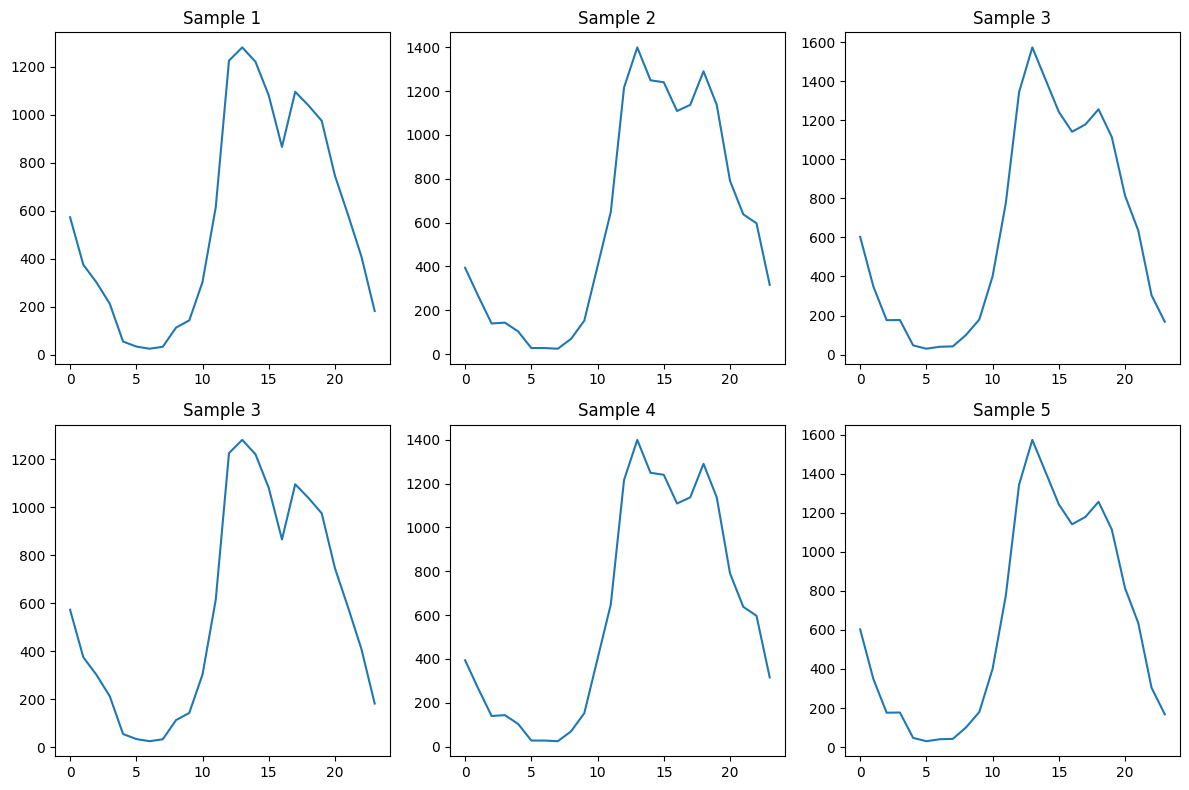

In [1]:
import matplotlib.pyplot as plt
from aeon.transformations.collection.dictionary_based import SAX
from aeon.datasets import load_unit_test
from sklearn.preprocessing import StandardScaler

X_train, y_train = load_unit_test(split="train")
X_test, y_test = load_unit_test(split="test")

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (learn the mean and standard deviation)
scaler.fit(X_train[:, 0, :])

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train[:, 0, :])
X_test_scaled = scaler.transform(X_test[:, 0, :])

sax = SAX(n_segments=10, alphabet_size=4)
X_train_sax = sax.fit_transform(X_train_scaled)

#X_train_sax = sax.fit_transform(X_train)
#X_test_sax = sax.fit_transform(X_test)

#print(X_train_sax)

# Print first 6 Samples from given dataset
# 2 rows with 3 columns:
fig, grid = plt.subplots(2, 3, figsize=(12, 8))
for j, row in enumerate(grid):
    for i, ax in enumerate(row):
        y = X_train[i][0]
        ax.plot(y)
        ax.set_title(f"Sample {j*len(grid) + i + 1}")

plt.tight_layout()
plt.show()


### Helper Methods

In [45]:
def returnAmount(number, name):
    correctName = name + "s" if number > 1 else name
    return f"{number} {correctName}"
    #return f"{number} {number == 1 ? name : name + "s"}"

# Print general information of dataset
def printGeneralInfo(sax, dataset, dataset_scaled, dataset_sax, increment, time_steps, n_segments):
    
    #print("sax.get_fitted_params")
    #print(sax.get_fitted_params())

    print(f"dataset.shape: {dataset.shape}")
    print(f"{dataset.shape[0]} samples, {dataset.shape[1]} dimensions, {dataset.shape[2]} time steps\n")
    
    print(f"dataset_scaled.shape: {dataset_scaled.shape}")
    print(f"dataset_sax.shape: {dataset_sax.shape}")
    
    print(f"\nn_segments: {n_segments}")
    print(f"increment: {increment}")
    
    
# Prints a grid of samples from a given dataset
# rows and columns have to be greater than 1
def drawGrid(sax, dataset, dataset_sax, n_segments, rows=2, columns=3):

    # Define segments as pairs of (start, end) indices with constant values
    # segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
    # segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

    time_steps = dataset.shape[2]
    assert time_steps % n_segments == 0, "Number of time frames has to be evenly dividable by the number of segments."

    
    increment = int(time_steps / n_segments)
    
    printGeneralInfo(sax, dataset, dataset_scaled, dataset_sax, increment, time_steps, n_segments)
    
    # Define a Colormap
    get_color = colormaps['tab10']

    # Define an alphabet with corresponding labels
    alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
    #segment_labels = [0,1,2,3,0,1]  # Alphabetic labels for each segment


    fig, grid = plt.subplots(rows, columns, figsize=(columns * 4, rows * 4))
    for i, row in enumerate(grid):
        for j, ax in enumerate(row):
            sample_index = i * columns + j

            sample = dataset[sample_index][0]
            sample_sax = dataset_sax[sample_index][0]

            # Plot original time series
            ax.plot(sample)
            ax.set_title(f"Sample {sample_index}")

            start = 0
            end = increment
            
            for s in range(n_segments):
                s_value = np.mean(sample[start : end])
                
                # Horizontal segment values for the plot (y-values)
                color = get_color(sample_sax[s])
                ax.hlines(y=s_value, xmin=start, xmax=end-1, color=color, linewidth=3)  # Horizontal line
                
                # Update indices
                start = end
                end += increment


    plt.tight_layout()
    plt.show()

    
def applySAX(dataset, n_segments=8, alphabet_size=4, rows=2, columns=3):

    # Initialize SAX
    sax = SAX(n_segments, alphabet_size)

    # Make sure that number of time steps is dividable by n_segments
    remainder = dataset.shape[2] % n_segments
    if(remainder != 0):
        fillers = n_segments - remainder
        meansToFill = np.repeat(np.mean(dataset, axis=2), fillers, axis=1)
        dataset = np.append(dataset[:,0,:], meansToFill, axis = 1) 
        # append function automatically removes all 1s in array shape, add it manually:  
        dataset = np.expand_dims(dataset, 1)
        print(f"Added {fillers} mean(s)")


    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit the scaler on the training data (learn the mean and standard deviation)
    # Transform both the training and test data
    # Transposition on input and output added, as StandardScaler operates column-wise (e.g. calculates mean of first column)
    dataset_scaled = scaler.fit_transform(dataset[:, 0, :].T).T

    # Fit and transform the data
    dataset_sax = sax.fit_transform(dataset_scaled)

    # Draw the grid
    drawGrid(sax, dataset, dataset_sax, n_segments, rows=rows, columns=columns)

# Test Dataset

Added 1 mean(s)
dataset.shape: (8, 1, 6)
8 samples, 1 dimensions, 6 time steps

dataset_scaled.shape: (42, 33)
dataset_sax.shape: (8, 1, 3)

n_segments: 3
increment: 2


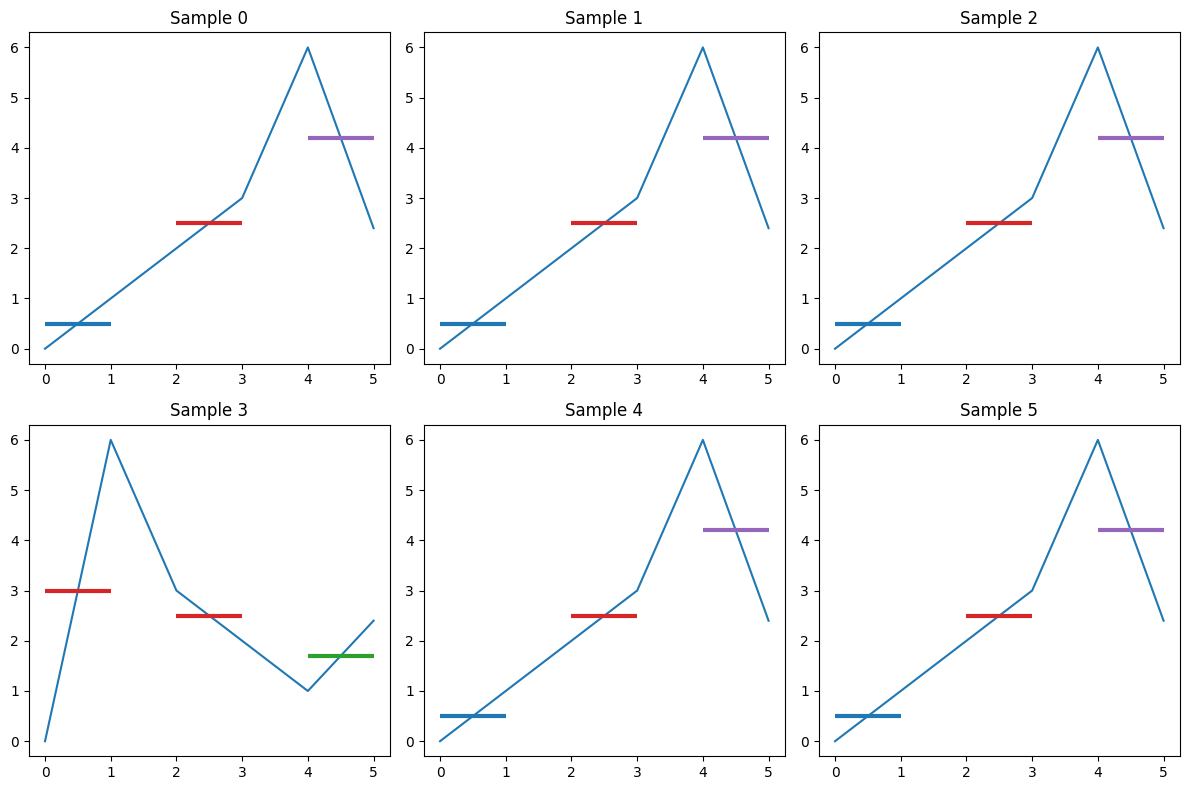

In [48]:
dataset = np.array([[[0, 1, 2, 3, 6]],
                    [[0, 1, 2, 3, 6]],
                    [[0, 1, 2, 3, 6]],
                    [[0, 6, 3, 2, 1]],
                    [[0, 1, 2, 3, 6]],
                    [[0, 1, 2, 3, 6]],
                    [[0, 1, 2, 3, 6]],
                    [[0, 6, 3, 2, 1]],])

applySAX(dataset, n_segments=3, alphabet_size=6)

### aeon - Load Unit Test Dataset

dataset.shape: (42, 1, 24)
42 samples, 1 dimensions, 24 time steps

dataset_scaled.shape: (42, 33)
dataset_sax.shape: (42, 1, 6)

n_segments: 6
increment: 4


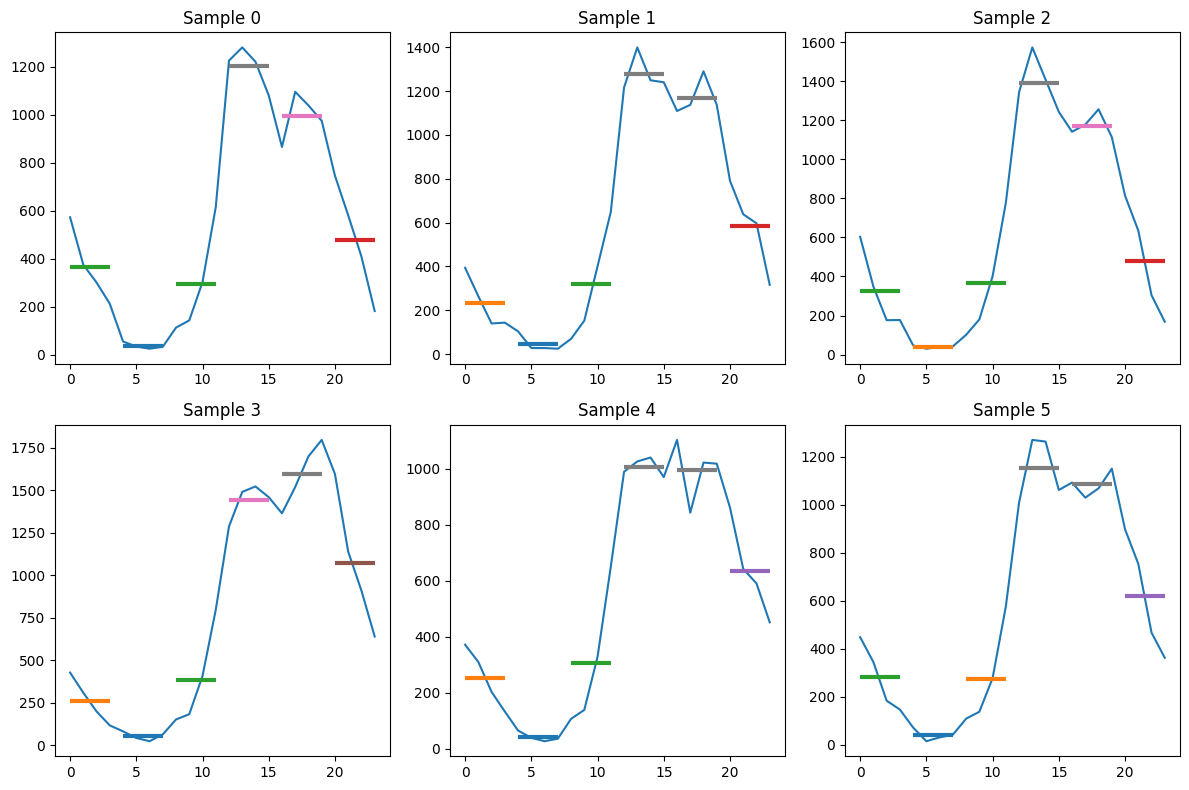

In [47]:
# Load the load_unit_test dataset
dataset, _ = load_unit_test()

applySAX(dataset, n_segments=6, alphabet_size=8)

### Numpy Playground

In [125]:
a = np.array([1,2,3,4,5])
a = np.append(a, 2*[6])
print(a)


dataset = np.array([[[1, 2, 3, 6]],
                    [[1, 2, 3, 6]],
                    [[1, 2, 3, 6]],
                    [[6, 3, 2, 1]],
                    [[1, 2, 3, 6]],
                    [[1, 2, 3, 6]],
                    [[1, 2, 3, 6]],
                    [[6, 3, 2, 1]],])

print(dataset.shape)
print(np.mean(dataset, axis=2))

remainder = 5
meansToFill = np.repeat(np.mean(dataset, axis=2), remainder, axis=1)
dataset = np.append(dataset[:,0,:], meansToFill, axis = 1)
dataset = np.expand_dims(dataset, 1)

print(dataset)

# Annotate with the corresponding alphabet label
#plt.text((start + end_excl) / 2, s_value, sample[s], color='black',
         #fontsize=12, ha='center', va='bottom', fontweight='bold')


[1 2 3 4 5 6 6]
(8, 1, 4)
[[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[[[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[6. 3. 2. 1. 3. 3. 3. 3. 3.]]

 [[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[1. 2. 3. 6. 3. 3. 3. 3. 3.]]

 [[6. 3. 2. 1. 3. 3. 3. 3. 3.]]]


### Visualization

In [ ]:
# Example time series data
n = 100  # Number of time steps
time_series = np.sin(np.linspace(0, 10, n))  # Example time series data

# Define segments as pairs of (start, end) indices
segments = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 99)]  # Segment start and end points

# Define the alphabet with 4 categories (A, B, C, D) corresponding to 4 colors
alphabet = ['A', 'B', 'C', 'D']  # Example alphabet of 4 categories
segment_labels = ['A', 'B', 'C', 'A', 'D']  # Example labels for each segment

# Define colors for each category in the alphabet
colors = {'A': 'orange', 'B': 'blue', 'C': 'green', 'D': 'red'}

# Plot the time series
plt.plot(time_series, label="$Time Series")

# Mark each segment with a different color based on its label
for i, (seg_start, seg_end) in enumerate(segments):
    label = segment_labels[i] # Get the label for the current segment (e.g., 'A', 'B', etc.)
    color = colors[label]  # Assign the corresponding color
    plt.axvspan(seg_start, seg_end, color=color, alpha=0.3, label=f"Segment {label}")

# Remove duplicate labels in the legend (for unique categories)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Time Series with Segments Marked by Alphabet Categories")
plt.show()


In [ ]:
# Generate example time series data
n = 100
time_series = np.sin(np.linspace(0, 10, n)) * 10  # Example time series data

# Define segments as pairs of (start, end) indices with constant values
segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

# Define an alphabet with corresponding labels and colors for each segment
alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
colors = ['red', 'green', 'blue', 'orange']  # Colors for each segment

# Assign each segment a label from the alphabet
segment_labels = ['a', 'b', 'c', 'd', 'a', 'b']  # Alphabetic labels for each segment

# Plot the time series
plt.plot(time_series, color='purple', alpha=0.4)  # The main time series

# Mark each segment with horizontal lines and annotate them
for i, (seg_start, seg_end) in enumerate(segments):
    y_value = segment_values[i]  # Constant y-value for the segment
    color = colors[alphabet.index(segment_labels[i])]  # Color for the segment
    plt.hlines(y=y_value, xmin=seg_start, xmax=seg_end, color=color, linewidth=3)  # Horizontal line
    
    # Annotate with the corresponding alphabet label
    plt.text((seg_start + seg_end) / 2, y_value, segment_labels[i], color='black', 
             fontsize=12, ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.title("Time Series with Colored Horizontal Segments")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Example time series data
n = 100
time_series = np.sin(np.linspace(0, 10, n)) * 10  # Example time series data

# Define segments as pairs of (start, end) indices with constant values
segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

# Define an alphabet with corresponding labels
alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
segment_labels = [0,1,2,3,0,1]  # Alphabetic labels for each segment

get_color = colormaps['tab10']

# Plot the time series
plt.plot(time_series, color='purple', alpha=0.4)  # The main time series

# Mark each segment with horizontal lines and annotate them
for i, (seg_start, seg_end) in enumerate(segments):
    y_value = segment_values[i]  # Constant y-value for the segment
    color = get_color(segment_labels[i])# Get color from the colormap based on the label
    plt.hlines(y=y_value, xmin=seg_start, xmax=seg_end, color=color, linewidth=3)  # Horizontal line
    
    # Annotate with the corresponding alphabet label
    plt.text((seg_start + seg_end) / 2, y_value, segment_labels[i], color='black', 
             fontsize=12, ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.title("Time Series with Colored Horizontal Segments (Auto Colors)")
plt.show()


### Playground

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

get_color = colormaps['Accent'].resampled(8)
c=get_color(4)

ypoints = np.array([3, 8, 1, 10, 5, 7])

plt.plot(ypoints, color=c)
plt.show()
